In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import add_dummy_feature

/opt/conda/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


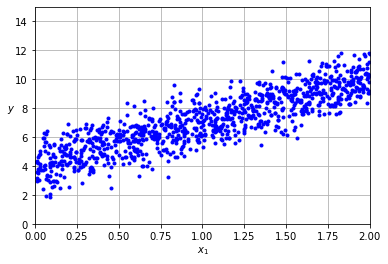

In [2]:
#create dataset

np.random.seed(43)
m = 1000
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

#plot dataset

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()

plt.show()

In [3]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# # Generating a more complex dataset with two features (X1, X2)
# np.random.seed(43)  # Resetting the seed for reproducibility

# m = 1000  # Number of samples
# X1 = 6 * np.random.rand(m, 1) - 3  # Random values between -3 and 3
# X2 = 6 * np.random.rand(m, 1) - 3  # Random values between -3 and 3

# # Polynomial equation: y = 0.5 * X1^2 + X1 * X2 - 0.5 * X2^2 + 3 + random noise
# y = 0.5 * X1**2 + X1 * X2 - 0.5 * X2**2 + 3 + np.random.randn(m, 1)

# # Plotting the dataset
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# ax.scatter(X1, X2, y, c='b', marker='o')
# ax.set_xlabel('X1')
# ax.set_ylabel('X2')
# ax.set_zlabel('y')

# plt.title('3D Plot of the Complex Dataset')
# plt.show()


In [4]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# # Rosenbrock function
# def rosenbrock(x, y):
#     a = 1
#     b = 100
#     return (a - x)**2 + b * (y - x**2)**2

# # Generating dataset for Rosenbrock function
# x = np.linspace(-2, 2, 100)  # Range for x-axis
# y = np.linspace(-1, 3, 100)  # Range for y-axis
# X, Y = np.meshgrid(x, y)
# Z = rosenbrock(X, Y)

# # Plotting
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

# ax.set_xlabel('X axis')
# ax.set_ylabel('Y axis')
# ax.set_zlabel('Z axis')
# ax.set_title('Rosenbrock Function')

# plt.show()

## Gradient Descent:

In [28]:
def gd_regressor(X, y, learning_rate=0.002, n_epochs=100):
    m = len(X)
    theta=np.zeros((2,1))
    #theta = np.random.randn(2, 1)
    theta_path_gd = []
    loss_path_gd = []
    #X_b = np.c_[np.ones((m, 1)), X]  #add a bias term to each instance
    X_b = add_dummy_feature(X)
    for epoch in range(n_epochs):
        for i in range(m):
            gradients = X_b.T.dot(X_b.dot(theta) - y)/m
            theta = theta - learning_rate * gradients

            theta_path_gd.append(theta.copy())  #copy theta to avoid modifying the original array
            loss = np.mean((X_b.dot(theta) - y) ** 2)
            loss_path_gd.append(loss)

    return theta, theta_path_gd, loss_path_gd

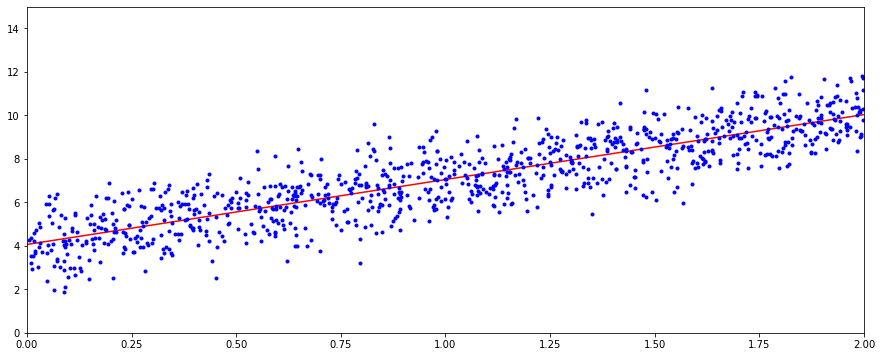

In [29]:
theta_gd, theta_path_gd, loss_path_gd = gd_regressor(X, y)
#call gd_regressor:
theta_gd, _, _ = gd_regressor(X, y)

#predict:
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2, 1)), x_new]
y_predict = x_new_b.dot(theta_gd)

#plot graph:
plt.figure(figsize=(15, 6))
plt.plot(x_new, y_predict, 'r-')  #predicted line
plt.plot(X, y, 'b.')  #original data points
plt.axis([0, 2, 0, 15])
plt.show()

No handles with labels found to put in legend.


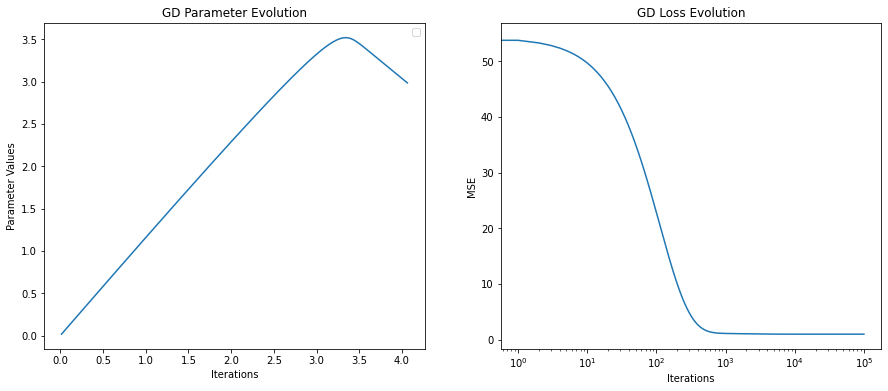

In [30]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)

theta_0_values = [theta[0, 0] for theta in theta_path_gd]
theta_1_values = [theta[1, 0] for theta in theta_path_gd]

plt.plot(theta_0_values, theta_1_values)


#plot parameter evolution
plt.title('GD Parameter Evolution')
plt.xlabel('Iterations')
plt.ylabel('Parameter Values')
plt.legend()

#plot loss evolution
plt.subplot(1, 2, 2)
plt.plot(loss_path_gd)
plt.title('GD Loss Evolution')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.xscale("log")
plt.show()

[0.85848959 0.85855033 0.85861116 ... 1.36052522 1.36052522 1.36052522]


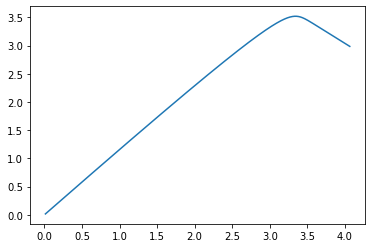

In [31]:
a=np.array(theta_0_values)/np.array(theta_1_values)
print(a)
plt.plot(theta_0_values,theta_1_values)

## Mini-Batch Gradient Descent

In [32]:
def minibatch_regressor(X, y, learning_rate=0.002, n_epochs=100, batch_size=10):
    m = len(X)
    #X_b = np.c_[np.ones((m, 1)), X]
    X_b = add_dummy_feature(X)
    theta=np.zeros((2,1))
    #theta = np.random.randn(2, 1)
    num_batches = int(m / batch_size)

    theta_path_minibatch = []
    loss_path_minibatch = []

    for epoch in range(n_epochs):
        for _ in range(num_batches):
            random_index = np.random.randint(m - batch_size)
            xi_batch = X_b[random_index:random_index + batch_size]
            yi_batch = y[random_index:random_index + batch_size]

            gradients = 2 * xi_batch.T.dot(xi_batch.dot(theta) - yi_batch) / batch_size
            theta = theta - learning_rate * gradients

            # Keep track of the evolution of theta and loss

            loss = np.mean((X_b.dot(theta) - y) ** 2)

            loss_path_minibatch.append(loss)
            theta_path_minibatch.append(theta.copy())

    return theta, theta_path_minibatch, loss_path_minibatch

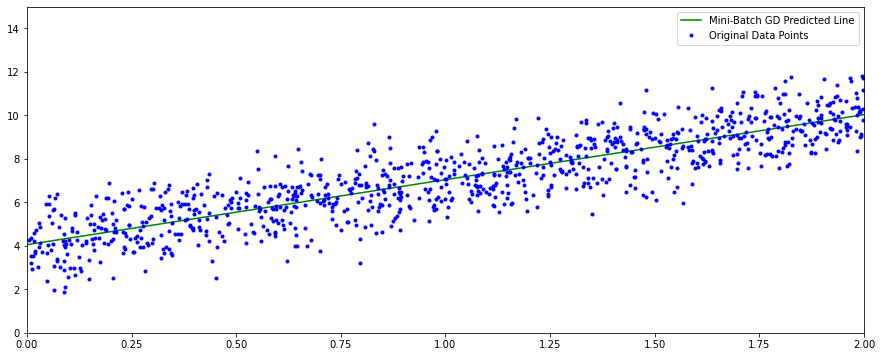

In [33]:
#mini-batch GD:
theta_minibatch, _, _ = minibatch_regressor(X, y)

#plot:
plt.figure(figsize=(15, 6))
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2, 1)), x_new]

#predicted line&original data
y_predict_minibatch = x_new_b.dot(theta_minibatch)
plt.plot(x_new, y_predict_minibatch, 'g-', label='Mini-Batch GD Predicted Line')
plt.plot(X, y, 'b.', label='Original Data Points')
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

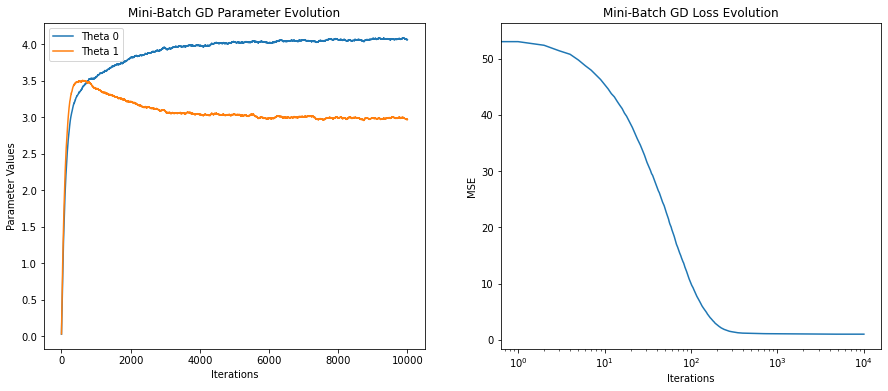

In [34]:
#call minibatch_regressor:
theta_minibatch, theta_path_minibatch, loss_path_minibatch = minibatch_regressor(X, y)

#plot parameter evolution
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)

#extract individual parameter
theta_0_values = [theta[0, 0] for theta in theta_path_minibatch]
theta_1_values = [theta[1, 0] for theta in theta_path_minibatch]

plt.plot(theta_0_values, label='Theta 0')
plt.plot(theta_1_values, label='Theta 1')

plt.title('Mini-Batch GD Parameter Evolution')
plt.xlabel('Iterations')
plt.ylabel('Parameter Values')
plt.legend()

#plot loss evolution
plt.subplot(1, 2, 2)
plt.plot(loss_path_minibatch)
plt.title('Mini-Batch GD Loss Evolution')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.xscale("log")
plt.show()

## Stochastic Gradient Descent:

In [35]:
def sgd_regressor(X, y, lr=0.002, n_epochs=100):

    m = len(X)
    theta=np.zeros((2,1))
    #theta = np.random.randn(2,1)
    theta_path_sgd = []
    loss_path_sgd = []

    X_b = add_dummy_feature(X)  # add b to each instance

    for epoch in range(n_epochs):

        for i in range(m):

            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]

            gradients = 2*xi.T.dot(xi.dot(theta)-yi)
            theta = theta - lr * gradients
            theta_path_sgd.append(theta)

            loss = np.mean(np.square(X_b.dot(theta)-y))
            loss_path_sgd.append(loss)

    return theta, theta_path_sgd, loss_path_sgd

In [36]:
sgd_theta, theta_path_sgd,loss_path_sgd = sgd_regressor(X,y)
print(sgd_theta)

[[3.99398398]
 [3.08092164]]


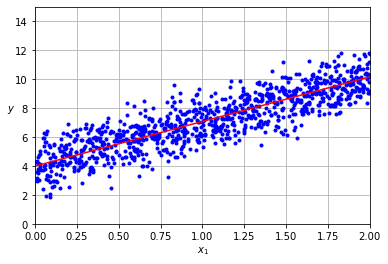

In [37]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance

y_predict = X_new_b @ sgd_theta

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "r-", label="SGD_Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()

plt.show()

## Adam

In [41]:
def adam_regressor(X, y, learning_rate=0.002, beta1=0.9, beta2=0.99, epsilon=1e-4, n_epochs=100):
    m = len(X)

    #theta = np.random.randn(2, 1)
    theta=np.zeros((2,1))
    m_t = np.zeros_like(theta)
    v_t = np.zeros_like(theta)
    t = 0

    theta_path_adam = []
    loss_path_adam = []

    X_b = add_dummy_feature(X)  # add b to each instance

    for epoch in range(n_epochs):
        for i in range(m):
            t += 1
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index + 1]
            yi = y[random_index:random_index + 1]

            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            m_t = beta1 * m_t + (1 - beta1) * gradients
            v_t = beta2 * v_t + (1 - beta2) * (gradients ** 2)

            m_t_hat = m_t / (1 - beta1 ** t)
            v_t_hat = v_t / (1 - beta2 ** t)

            theta = theta - learning_rate * m_t_hat / (np.sqrt(v_t_hat) + epsilon)

            theta_path_adam.append(theta)

            loss = np.mean(np.square(X_b.dot(theta)-y))
            loss_path_adam.append(loss)
    return theta, theta_path_adam, loss_path_adam

In [42]:
adam_theta, theta_path_adam, loss_path_adam = adam_regressor(X,y)
print(adam_theta)

[[4.01526649]
 [2.97511003]]


In [43]:
print(X.shape)

(1000, 1)


In [44]:
print(y.shape)

(1000, 1)


## BFGS

In [19]:
import numpy as np
from scipy.optimize import minimize

def add_dummy_feature(X):
    return np.c_[np.ones((X.shape[0], 1)), X]

def mse_loss(theta, X, y):
    theta = theta.reshape(-1, 1)
    predictions = X.dot(theta)
    return np.mean(np.square(predictions - y))

def gradient(theta, X, y):
    theta = theta.reshape(-1, 1)
    grad = 2 / len(X) * X.T.dot(X.dot(theta) - y)
    return grad.ravel()

def bfgs_regressor(X, y):
    X_b = add_dummy_feature(X)
    initial_theta = np.zeros((X_b.shape[1], 1))

    theta_path_bfgs = []
    loss_path_bfgs = []

    def callback(theta):
        theta_reshaped = theta.reshape(-1, 1)
        theta_path_bfgs.append(theta_reshaped.copy())
        loss_path_bfgs.append(mse_loss(theta_reshaped, X_b, y))

    result = minimize(fun=mse_loss, x0=initial_theta.ravel(), args=(X_b, y), method='BFGS', jac=gradient, callback=callback)

    theta_final = result.x.reshape(-1, 1)
    return theta_final, theta_path_bfgs, loss_path_bfgs

bfgs_theta, theta_path_bfgs, loss_path_bfgs = bfgs_regressor(X, y)
print(bfgs_theta)


[[4.06298754]
 [2.98633754]]


## Error Path

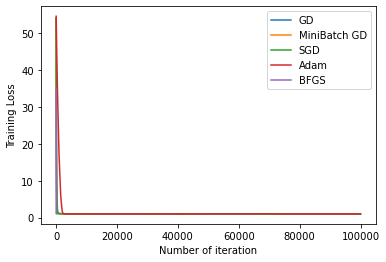

In [45]:
# for 3 gd+adam:
plt.plot(loss_path_gd, label = 'GD')
plt.plot(loss_path_minibatch, label = 'MiniBatch GD')
plt.plot(loss_path_sgd, label = 'SGD')
plt.plot(loss_path_adam, label = 'Adam')
plt.plot(loss_path_bfgs, label = 'BFGS')
#plt.ylim(0.95,1.3)

plt.xlabel('Number of iteration')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

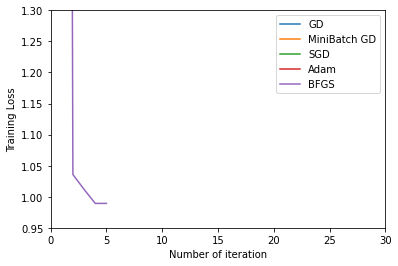

In [61]:
# for 3 gd+adam:
plt.plot(loss_path_gd, label = 'GD')
plt.plot(loss_path_minibatch, label = 'MiniBatch GD')
plt.plot(loss_path_sgd, label = 'SGD')
plt.plot(loss_path_adam, label = 'Adam')
plt.plot(loss_path_bfgs, label = 'BFGS')
0
plt.xlim(0,30)
plt.ylim(0.95,1.3)

plt.xlabel('Number of iteration')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

In [22]:
#sgd_theta, theta_path_sgd,loss_path_sgd = sgd_regressor(X,y,n_epochs=100)
#adam_theta, theta_path_adam,loss_path_adam = adam_regressor(X,y)

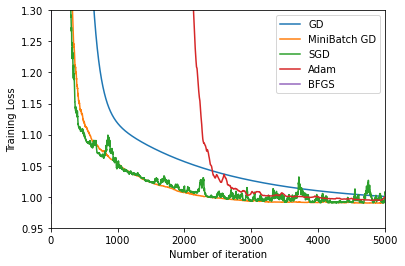

In [57]:
#Error path
plt.plot(loss_path_gd, label = 'GD')
plt.plot(loss_path_minibatch, label = 'MiniBatch GD')
plt.plot(loss_path_sgd, label = 'SGD')
plt.plot(loss_path_adam, label = 'Adam')
plt.plot(loss_path_bfgs, label = 'BFGS')

plt.ylim(0.95,1.3)
plt.xlim(0,5000)

plt.xlabel('Number of iteration')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

## Path

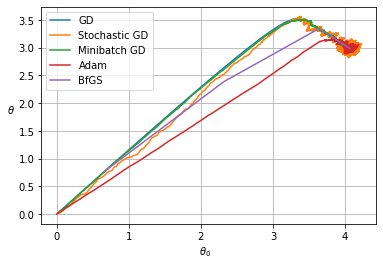

In [62]:
from math import ceil
theta_path_gd=np.array(theta_path_gd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_minibatch=np.array(theta_path_minibatch)
theta_path_adam=np.array(theta_path_adam)
theta_path_bfgs=np.array(theta_path_bfgs)

#plt.figure(figsize=(7, 4))

plt.plot(theta_path_gd[:, 0], theta_path_gd[:, 1],label="GD")
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1],label="Stochastic GD")
plt.plot(theta_path_minibatch[:, 0], theta_path_minibatch[:, 1], label="Minibatch GD")
plt.plot(theta_path_adam[:, 0], theta_path_adam[:, 1], label="Adam")
plt.plot(theta_path_bfgs[:, 0], theta_path_bfgs[:, 1], label="BfGS")


#plt.xlim(3,4)
#plt.ylim(2.5,4)
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$   ")
plt.ylabel(r"$\theta$   ", rotation=0)
#plt.axis([2.6, 5, 2.3, 4])
plt.grid()

plt.show()

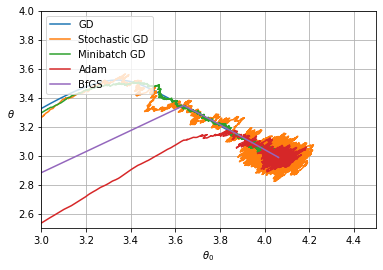

In [63]:
plt.plot(theta_path_gd[:, 0], theta_path_gd[:, 1],label="GD")
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1],label="Stochastic GD")
plt.plot(theta_path_minibatch[:, 0], theta_path_minibatch[:, 1], label="Minibatch GD")
plt.plot(theta_path_adam[:, 0], theta_path_adam[:, 1], label="Adam")
plt.plot(theta_path_bfgs[:, 0], theta_path_bfgs[:, 1], label="BfGS")

plt.xlim(3,4.5)
plt.ylim(2.5,4)
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$ ")
plt.ylabel(r"$\theta$   ", rotation=0)
#plt.axis([2.6, 5, 2.3, 4])
plt.grid()

plt.show()